### **1. Librerías**

In [1]:
# Manipulación de Datos
import pandas as pd
import numpy as np

# Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns


# Bibliotecas de Machine Learning (ML)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


# Preprocesamiento de Datos
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Codificación de Variables Categóricas
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.woe import WOEEncoder

# Evaluación de Modelos
from sklearn.metrics import (confusion_matrix, 
                            accuracy_score, precision_score, recall_score, 
                            f1_score, roc_curve, 
                            precision_recall_curve, auc)

# División de Datos y Validación Cruzada
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Optimización de Modelos
import optuna

# Manejo de Advertencias
import warnings

### **2. Datos**

In [2]:
# Carga de datos
df = pd.read_csv('../../Data/processed/delitos_mvd_final_sin_vd.csv')

In [3]:
# Visualización de los primeros registros
df.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
COUNT_DELITOS,1,1,6,1,4


In [4]:
# Transformación de la variable objetivo a binaria
df['RIESGO'] = df['RIESGO'].apply(lambda x: 1 if x == 'Alto' else 0)

In [5]:
#CHequeo de transformación
df['RIESGO'].value_counts()

RIESGO
0    181017
1     60626
Name: count, dtype: int64

In [6]:
# Nombre de las variables
df.columns

Index(['BARRIO_MONTEVIDEO', 'FECHA', 'AÑO', 'MES', 'DIA_MES', 'DIA_SEMANA',
       'SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'COUNT_DELITOS', 'POBLACION',
       'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'TEMPMIN', 'TEMP',
       'FEELSLIKEMAX', 'FEELSLIKEMIN', 'FEELSLIKE', 'HUMIDITY', 'PRECIP',
       'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY', 'SEVERERISK',
       'CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
       'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO',
       'NO_LABORABLE', 'NOMBRE_FESTIVO', 'COUNT_DELITOS_NORM', 'RIESGO'],
      dtype='object')

In [8]:
# Datos perdidos
df.isna().sum()

BARRIO_MONTEVIDEO               0
FECHA                           0
AÑO                             0
MES                             0
DIA_MES                         0
DIA_SEMANA                      0
SEMANA_MES                      0
SEMESTRE                        0
TRIMESTRE                       0
COUNT_DELITOS                   0
POBLACION                       0
TURISTICO                       0
MUNICIPIO                       0
PLAYA                           0
INSE                            0
TEMPMAX                         0
TEMPMIN                         0
TEMP                            0
FEELSLIKEMAX                    0
FEELSLIKEMIN                    0
FEELSLIKE                       0
HUMIDITY                        0
PRECIP                          0
WINDGUST                    38059
WINDSPEED                       0
SEALEVELPRESSURE                0
VISIBILITY                      0
SEVERERISK                      0
CONDITIONCLEAR                  0
CONDITIONPARTI

In [9]:
# Asignamos valor de WINDSPEED a datos nulos de WINDGUST
df_red['WINDGUST'] = df_red['WINDGUST'].fillna(df_red['WINDSPEED'])

#### 2.1. Selección de variables a utilizar

In [ ]:
# Selección de variables para modelar
df_red = df[['BARRIO_MONTEVIDEO', 'MES', 'DIA_MES', 'DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE',
        'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP','WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE','CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
        'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO','NO_LABORABLE', 'NOMBRE_FESTIVO', 'RIESGO']].copy()

In [ ]:
# Chequeo de dataset selecconado
df_red.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
TURISTICO,0,0,0,0,0
MUNICIPIO,C,C,C,C,C
PLAYA,NO,NO,NO,NO,NO


### **3. Separación en training y test dataset**

In [11]:
# Defincicón de objetivo
X = df_red.drop('RIESGO', axis=1)
y = df_red['RIESGO']

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Chequeamos la el tamaño de los datos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(193314, 26)
(48329, 26)
(193314,)
(48329,)


### **4. Feature encoding y scaling**

#### 4.1. Definicion de variables para encoding

In [13]:
# Definición de variables categóricas para one hot-encoding
one_hot_columns = ['DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'PLAYA', 'WINDIRCAT', 'SEVERERISKCAT', 'NO_LABORABLE']

# Definición de variables numéricas para estandarización
continuous_columns = ['INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP', 'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'TASA_DESEMPLEO'] # Eliminé visivility

# Definición de variables para target encoding
targ_enc_columns = ['DIA_MES', 'MES' , 'MUNICIPIO', 'NOMBRE_FESTIVO']

# Definición de variables para WOE
woe_columns = ['BARRIO_MONTEVIDEO']

#### 4.2.Definición de Encoders

- One hot Encoding

In [14]:
# Function to apply One-Hot Encoding to the specified categorical columns.
def apply_one_hot_encoding(X_train, X_test, categorical_columns):
    """
    Apply One-Hot Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - categorical_columns: list, list of categorical columns to encode.

    Returns:
    - X_train_encoded: DataFrame, the training dataset with One-Hot Encoded columns.
    - X_test_encoded: DataFrame, the testing dataset with One-Hot Encoded columns.
    - encoder: Fitted OneHotEncoder instance from category_encoders.
    """
    # Initialize the OneHotEncoder from category_encoders
    encoder = OneHotEncoder(cols=categorical_columns, use_cat_names=True)

    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Transform the testing set using the same encoder
    X_test_encoded = encoder.transform(X_test)

    return X_train_encoded, X_test_encoded, encoder

- Standard Scaling Encoding

In [15]:
# Function to apply Standard Scaling to the specified numerical columns.
def apply_scaling(X_train, X_test, scale_columns):
    """
    Apply Standard Scaling to the specified numerical columns.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - scale_columns: list, list of numerical columns to scale.

    Returns:
    - X_train_scaled: DataFrame, the training dataset with scaled columns.
    - X_test_scaled: DataFrame, the testing dataset with scaled columns.
    - scaler: Fitted StandardScaler instance.
    """
    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Fit the scaler on the training set and transform
    X_train_scaled = X_train.copy()
    X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])

    # Transform the testing set using the same scaler
    X_test_scaled = X_test.copy()
    X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

    return X_train_scaled, X_test_scaled, scaler

- Target Encoding

In [16]:
# Function to apply Target encoding to the specified categorical columns.
def apply_target_encoding(X_train, y_train, X_test, target_columns):
    """
    Apply Target Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - target_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with Target-encoded columns.
    - X_test_transformed: DataFrame, the testing dataset with Target-encoded columns.
    - target_encoder: Fitted TargetEncoder instance.
    """
    # Initialize the Target encoder
    target_encoder = TargetEncoder(cols=target_columns)

    # Fit and transform the training set
    X_train_transformed = target_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = target_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, target_encoder

- WOE Encoding

In [17]:
# Function to apply WOE encoding to the specified categorical columns.
def apply_woe(X_train, y_train, X_test, woe_columns):
    """
    Apply WOE encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - woe_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with WOE-transformed columns.
    - X_test_transformed: DataFrame, the testing dataset with WOE-transformed columns.
    - woe_encoder: Fitted WOEEncoder instance.
    """
    # Initialize the WOE encoder
    woe_encoder = WOEEncoder(cols=woe_columns)

    # Fit and transform the training set
    X_train_transformed = woe_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = woe_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, woe_encoder

- Función para aplicar el encoding

In [18]:
# Function to transform Train and Test data using the defined encoders

def encoding_data (X_train, y_train, X_test):
    """
    Transforms Train and Test datasets by applying WOE encoding, Target encoding, 
    Standard scaling, and One-Hot encoding.
    
    Parameters:
    - X_train: DataFrame, training features.
    - y_train: Series/DataFrame, target variable for training.
    - X_test: DataFrame, testing features.
    
    Returns:
    - X_train_enc: Transformed training dataset.
    - X_test_enc: Transformed testing dataset.
    - woe_encoder, target_encoder, scaler, one_hot_encoder: Fitted encoders and scaler.
    """
    
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()

    
    
    # Applying Target encoding
    X_train_enc, X_test_enc, target_encoder = apply_target_encoding(X_train_enc, y_train, X_test_enc, targ_enc_columns)
    
    # Applying Standard Scaling
    X_train_enc, X_test_enc, scaler = apply_scaling(X_train_enc, X_test_enc, continuous_columns)
    
    # Applying One-hot encoding
    X_train_enc, X_test_enc, one_hot_encoder = apply_one_hot_encoding(X_train_enc, X_test_enc, one_hot_columns)
    
    # Applying WOE encoding
    X_train_enc, X_test_enc, woe_encoder = apply_woe(X_train_enc, y_train, X_test_enc, woe_columns)
    
    return X_train_enc, X_test_enc

#### 4.3. Aplicando Encoding a Training y Test dataset

In [19]:
# Encoding de Train y Test
X_train_enc, X_test_enc = encoding_data(X_train, y_train, X_test)

In [20]:
# Chequeo de Train transformado
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193314 entries, 3043 to 43074
Data columns (total 47 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BARRIO_MONTEVIDEO          193314 non-null  float64
 1   MES                        193314 non-null  float64
 2   DIA_MES                    193314 non-null  float64
 3   DIA_SEMANA_VIERNES         193314 non-null  int64  
 4   DIA_SEMANA_MARTES          193314 non-null  int64  
 5   DIA_SEMANA_SABADO          193314 non-null  int64  
 6   DIA_SEMANA_MIERCOLES       193314 non-null  int64  
 7   DIA_SEMANA_JUEVES          193314 non-null  int64  
 8   DIA_SEMANA_LUNES           193314 non-null  int64  
 9   DIA_SEMANA_DOMINGO         193314 non-null  int64  
 10  SEMANA_MES_1.0             193314 non-null  int64  
 11  SEMANA_MES_2.0             193314 non-null  int64  
 12  SEMANA_MES_4.0             193314 non-null  int64  
 13  SEMANA_MES_5.0             19331

In [21]:
X_train_enc.head().T

,3043,207896,202209,64752,18064
BARRIO_MONTEVIDEO,0.225654,-0.314118,0.029685,0.164925,0.506326
MES,0.253142,0.242432,0.242432,0.240653,0.277214
DIA_MES,0.252090,0.238178,0.257232,0.246560,0.254139
DIA_SEMANA_VIERNES,1.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_MARTES,0.000000,1.000000,0.000000,1.000000,0.000000
DIA_SEMANA_SABADO,0.000000,0.000000,1.000000,0.000000,0.000000
DIA_SEMANA_MIERCOLES,0.000000,0.000000,0.000000,0.000000,1.000000
DIA_SEMANA_JUEVES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_LUNES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_DOMINGO,0.000000,0.000000,0.000000,0.000000,0.000000


### **5. Funciónes**

#### 5.1. Cálculo de métricas

In [185]:
def compute_metrics(model, X_train, y_train, X_test, y_test):
    """
    Calcula y muestra métricas de evaluación para modelos de clasificación en datasets balanceados o desbalanceados.
    Devuelve un diccionario con las métricas, nombre y mejor umbral para el F1 del modelo evaluado.
    """

    # Obtener probabilidades de predicción en test
    y_probs = model.predict_proba(X_test)[:, 1]  

    # Calcular la curva de precisión-recall
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # Calcular F1 para cada umbral
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

    # Encontrar el mejor umbral para F1
    best_threshold_f1 = thresholds[np.argmax(f1_scores[:-1])]  

    # Graficar Recall y F1 en función del umbral
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, recalls[:-1], label="Recall", color="green")        
    plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")   
    plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f'{model.__class__.__name__} - Recall y F1 en función del umbral')
    plt.legend()
    plt.grid()
    plt.show()

    # Predicciones basadas en el umbral elegido
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    y_pred_train = (y_pred_proba_train >= best_threshold_f1).astype(bool)
    y_pred_test = (y_pred_proba_test >= best_threshold_f1).astype(bool)

    # Curva ROC
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)

    # Matriz de confusión
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

    specificity_train = tn_train / (tn_train + fp_train)
    specificity_test = tn_test / (tn_test + fp_test)
    
    # Métricas en Train
    print(f'{model.__class__.__name__}')
    print(f'Métricas calculadas con el mejor umbral para F1 en Test ({best_threshold_f1:.3f})')
    print(' ')
    print(f' 🟠 Train results:')
    print(f" AUC: {auc(fpr_train, tpr_train):.3f}")
    print(f" Recall : {recall_score(y_train, y_pred_train):.3f}")
    print(f" F1-score : {f1_score(y_train, y_pred_train):.3f}")
    print(f" Precision : {precision_score(y_train, y_pred_train):.3f}")
    print(f" Specificity: {specificity_train:.3f}")
    print(f" Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
    print(' ')

    # Métricas en Test
    print(f' 🔵 Test results:')
    print(f" AUC: {auc(fpr_test, tpr_test):.3f}")
    print(f" Recall : {recall_score(y_test, y_pred_test):.3f}")
    print(f" F1-score : {f1_score(y_test, y_pred_test):.3f}")
    print(f" Precision : {precision_score(y_test, y_pred_test):.3f}")
    print(f" Specificity: {specificity_test:.3f}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")  

    # Crear curva ROC
    plt.figure(figsize=(6, 6))
    plt.plot(fpr_train, tpr_train, '-r', label='Train ROC')
    plt.plot(fpr_test, tpr_test, '-b', label='Test ROC')
    plt.plot([0, 1], [0, 1], ls="--", color='gray')  # Línea diagonal para referencia
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.grid()
    plt.show()

    # Mostrar matrices de confusión como gráficos de calor
    fig, axes = plt.subplots(1, 2, figsize=(12, 1))  

    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt="d", cmap="Reds", ax=axes[0])
    axes[0].set_title("Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title("Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.show()
    
    # Almacenar métricas en un diccionario
    results = {
        "model_name": model.__class__.__name__,
        "best_threshold_f1": best_threshold_f1,
        "train_metrics": {
            "AUC": auc(fpr_train, tpr_train),
            "Recall": recall_score(y_train, y_pred_train),
            "F1-Score": f1_score(y_train, y_pred_train),
            "Precision": precision_score(y_train, y_pred_train),
            "Specificity": specificity_train,
            "Accuracy": accuracy_score(y_train, y_pred_train)
        },
        "test_metrics": {
            "AUC": auc(fpr_test, tpr_test),
            "Recall": recall_score(y_test, y_pred_test),
            "F1-Score": f1_score(y_test, y_pred_test),
            "Precision": precision_score(y_test, y_pred_test),
            "Specificity": specificity_test,
            "Accuracy": accuracy_score(y_test, y_pred_test)
        }
    }
    
    return results

### **6. Modelado**

#### 6.1. Cálculo de Feature Importance con Arbol de decisión

In [142]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train_enc, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

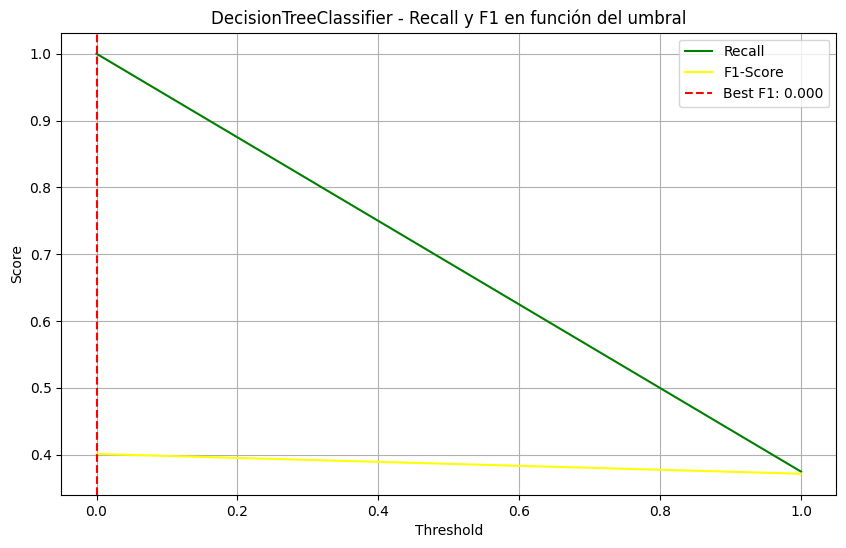

DecisionTreeClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.000)
 
 🟠 Train results:
 AUC: 1.000
 Recall : 1.000
 F1-score : 0.401
 Precision : 0.251
 Specificity: 0.000
 Accuracy: 0.251
 
 🔵 Test results:
 AUC: 0.580
 Recall : 1.000
 F1-score : 0.401
 Precision : 0.251
 Specificity: 0.000
 Accuracy: 0.251


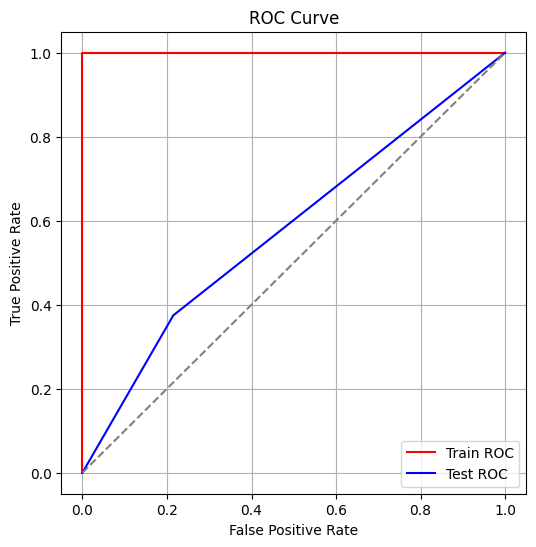

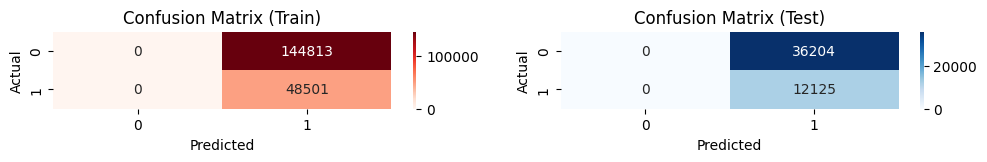

In [263]:
# Calculo de métricas
metrica_rl_1 = compute_metrics(model_dt_1, X_train_enc, y_train, X_test_enc, y_test)

- Se define definen subsets con variables de mayor importancia

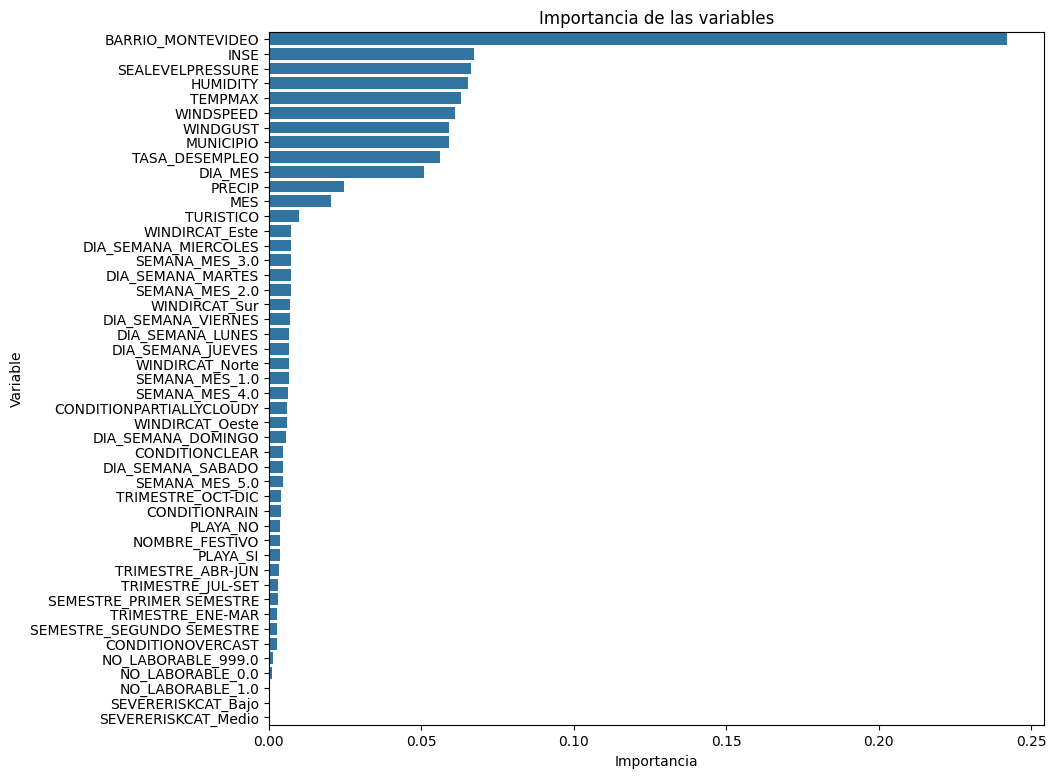

In [149]:
# Obtener la importancia de las variables
importancias = model_dt_1.feature_importances_
variables = X_train_enc.columns

# Graficar importancia de las variables ordenadas
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x='Importancia', y='Variable', data=df_importancia)
plt.title('Importancia de las variables')
plt.show()

top_n = 20  # Número de variables a conservar
top_variables = df_importancia.iloc[:top_n]['Variable'].values

# Redefinir dataset con menos variables
X_train_reducido = X_train_enc[top_variables]
X_test_reducido = X_test_enc[top_variables]

#### 6.2. Naive Bayes

In [351]:
# Definir el modelo
model_nb_1 = GaussianNB()

# Entrenar el modelo
model_nb_1.fit(X_train_reducido, y_train)

GaussianNB()

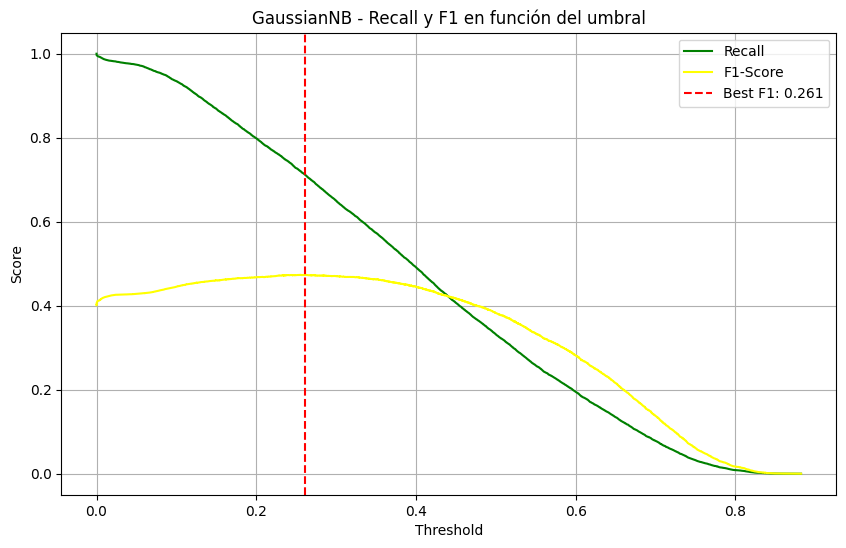

GaussianNB
Métricas calculadas con el mejor umbral para F1 en Test (0.261)
 
 🟠 Train results:
 AUC: 0.691
 Recall : 0.705
 F1-score : 0.471
 Precision : 0.353
 Specificity: 0.568
 Accuracy: 0.602
 
 🔵 Test results:
 AUC: 0.694
 Recall : 0.713
 F1-score : 0.474
 Precision : 0.355
 Specificity: 0.565
 Accuracy: 0.602


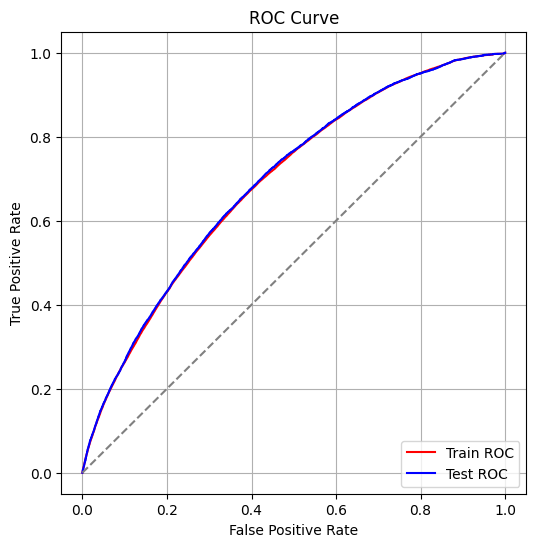

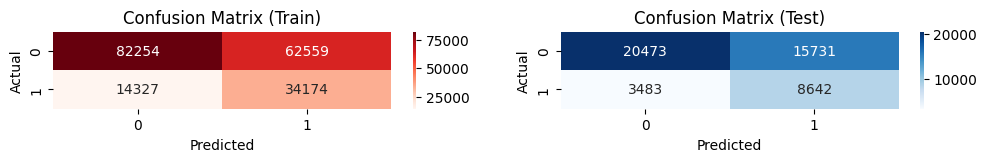

In [352]:
# Calcular métricas
metricas_nb_1 = compute_metrics(model_nb_1, X_train_reducido, y_train, X_test_reducido, y_test)

- Optimización de NB con Optuna

In [354]:
# Desactivar advertencias para una salida más limpia
warnings.filterwarnings("ignore")

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros para Gaussian Naive Bayes
    params = {
        'var_smoothing': trial.suggest_float('var_smoothing', 1e-9, 1e-3, log=True),
        'priors': trial.suggest_categorical('priors', [None, [0.75, 0.25], [0.6, 0.4], [0.5, 0.5]])
    }

    # Crear el modelo Naive Bayes con los hiperparámetros sugeridos
    model = GaussianNB(**params)

    # Evaluación usando validación cruzada (foco en AUC-ROC)
    auc = cross_val_score(
        model,
        X_train_reducido,
        y_train,
        cv=cv,
        scoring='roc_auc',  
        n_jobs=-1           
    ).mean()

    return auc  # 

# Configurar Optuna con un pruner para detener pruebas ineficientes
pruner = optuna.pruners.HyperbandPruner(min_resource=10, max_resource=50, reduction_factor=3)

# Iniciar la optimización
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=100, show_progress_bar=True, timeout=3600)  # 100 pruebas o 1 hora máximo

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

  0%|          | 0/100 [00:00<?, ?it/s]

Mejores hiperparámetros: {'var_smoothing': 0.0009999706252331547, 'priors': [0.6, 0.4]}


In [355]:
# definimos el modelo con los mejores hiperparámetros
model_nb_opt = GaussianNB(**study.best_params)

# Entrenamos el modelo
model_nb_opt.fit(X_train_reducido, y_train)

GaussianNB(priors=[0.6, 0.4], var_smoothing=0.0009999706252331547)

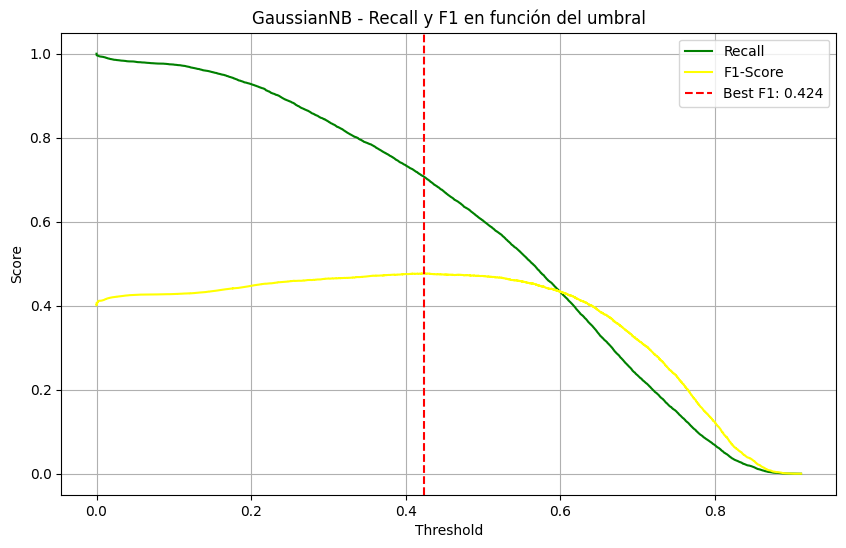

GaussianNB
Métricas calculadas con el mejor umbral para F1 en Test (0.424)
 
 🟠 Train results:
 AUC: 0.695
 Recall : 0.697
 F1-score : 0.473
 Precision : 0.357
 Specificity: 0.580
 Accuracy: 0.610
 
 🔵 Test results:
 AUC: 0.698
 Recall : 0.708
 F1-score : 0.477
 Precision : 0.360
 Specificity: 0.578
 Accuracy: 0.611


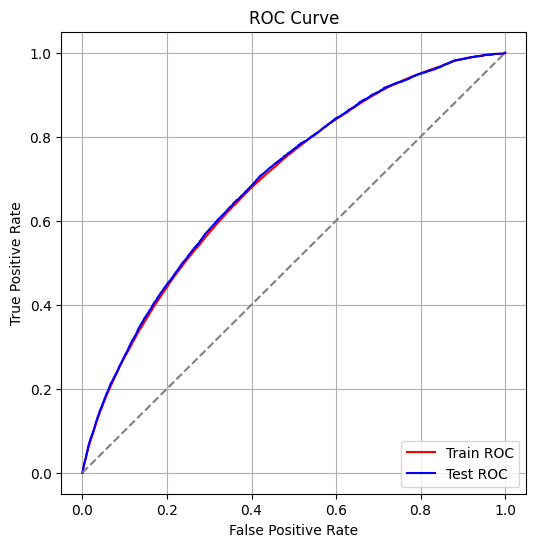

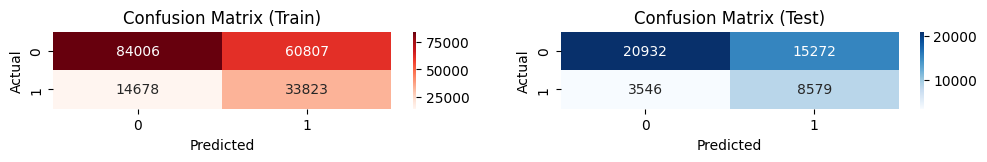

In [356]:
# Calculamos métricas
metricas_nb_opt = compute_metrics(model_nb_opt, X_train_reducido, y_train, X_test_reducido, y_test)

In [357]:
# Creamos una lista con las métricas
metricas_globales = []

# Guardardamos las metricas
metricas_globales.append(metricas_nb_opt)

#### 6.3. Regresión Logística

- Entrenamos modelo con el dataset completo

In [150]:
# Definir el modelo
model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
# Entrenar el modelo
model_rl_1.fit(X_train_enc, y_train)

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='liblinear')

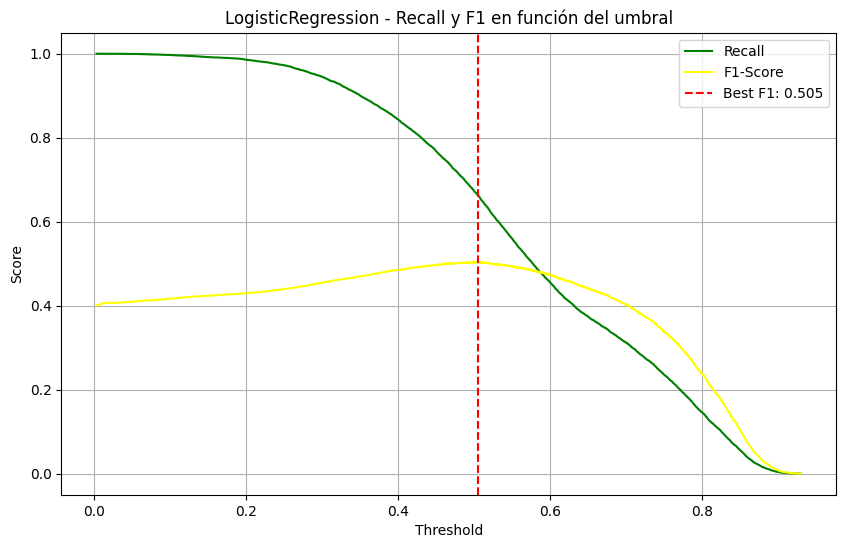

LogisticRegression
Métricas calculadas con el mejor umbral para F1 en Test (0.505)
 
 🟠 Train results:
 AUC: 0.730
 Recall : 0.649
 F1-score : 0.495
 Precision : 0.400
 Specificity: 0.674
 Accuracy: 0.668
 
 🔵 Test results:
 AUC: 0.736
 Recall : 0.663
 F1-score : 0.505
 Precision : 0.407
 Specificity: 0.676
 Accuracy: 0.673


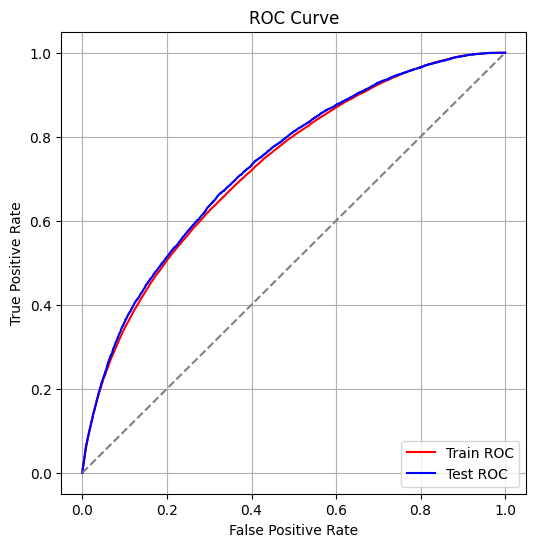

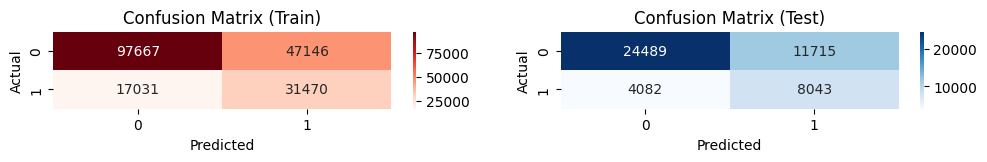

In [264]:
# Calcular métricas
metrica_rl_1 = compute_metrics(model_rl_1, X_train_enc, y_train, X_test_enc, y_test)

- Entrenamos modelo con dataset reducido a las variables más importantes

In [152]:
# Definir el modelo
model_rl_2 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
# Entrenar el modelo
model_rl_2.fit(X_train_reducido, y_train)

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='liblinear')

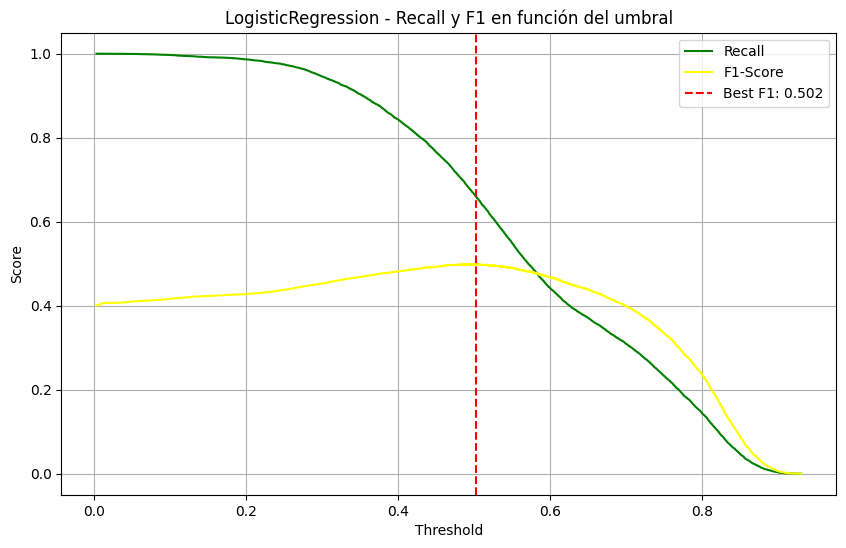

LogisticRegression
Métricas calculadas con el mejor umbral para F1 en Test (0.502)
 
 🟠 Train results:
 AUC: 0.727
 Recall : 0.651
 F1-score : 0.492
 Precision : 0.396
 Specificity: 0.667
 Accuracy: 0.663
 
 🔵 Test results:
 AUC: 0.733
 Recall : 0.661
 F1-score : 0.499
 Precision : 0.401
 Specificity: 0.669
 Accuracy: 0.667


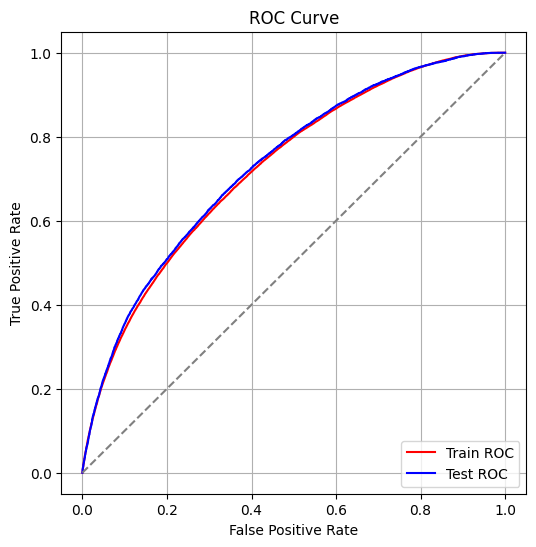

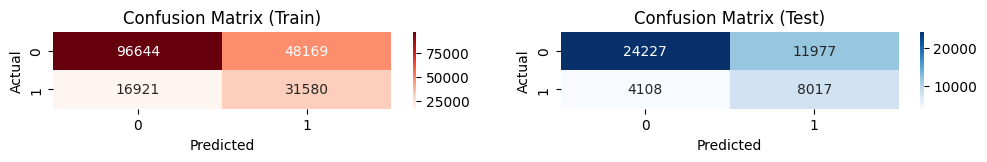

In [265]:
# Calcular métricas
metrica_rl_2 = compute_metrics(model_rl_2, X_train_reducido, y_train, X_test_reducido, y_test)

- Los resultados utilizando dataset completo y el reducido a las variables más importantes son similares.
- Vamos a entrenar a todos los modelosutilizando el dataset reducido para mejorar eficiencia.

- Optimizacion de RL con Optuna

In [163]:
# Optimización de Hyperparámetros con Optuna

# Desactivar logs y warnings
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")

# Validación cruzada estratificada para datasets desbalanceados
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Función objetivo para Optuna
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.0001, 10, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'sag', 'saga', 'newton-cholesky']),
        'penalty': trial.suggest_categorical('penalty', [None, 'l2']),
        'max_iter': trial.suggest_int('max_iter', 100, 500),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'tol': trial.suggest_float('tol', 1e-6, 1e-3, log=True),
        'random_state': 42,
        'n_jobs': -1
    }

    model = LogisticRegression(**params)

    # Validación cruzada estratificada con AUC como métrica
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return auc

# Pruner para acelerar la optimización
pruner = optuna.pruners.HyperbandPruner(min_resource=5, max_resource=20, reduction_factor=3)

# Optuna con pruner configurado
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=100)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

Mejores hiperparámetros: {'C': 0.09870152497707407, 'solver': 'lbfgs', 'penalty': None, 'max_iter': 162, 'class_weight': 'balanced', 'tol': 1.0058442578695453e-06}


In [164]:
# Definimos el modelo con los hiperparámetros óptimos
model_rl_opt = LogisticRegression(**study.best_params)

# Entrenamos el modelo 
model_rl_opt.fit(X_train_reducido, y_train)

LogisticRegression(C=0.09870152497707407, class_weight='balanced', max_iter=162,
                   penalty=None, tol=1.0058442578695453e-06)

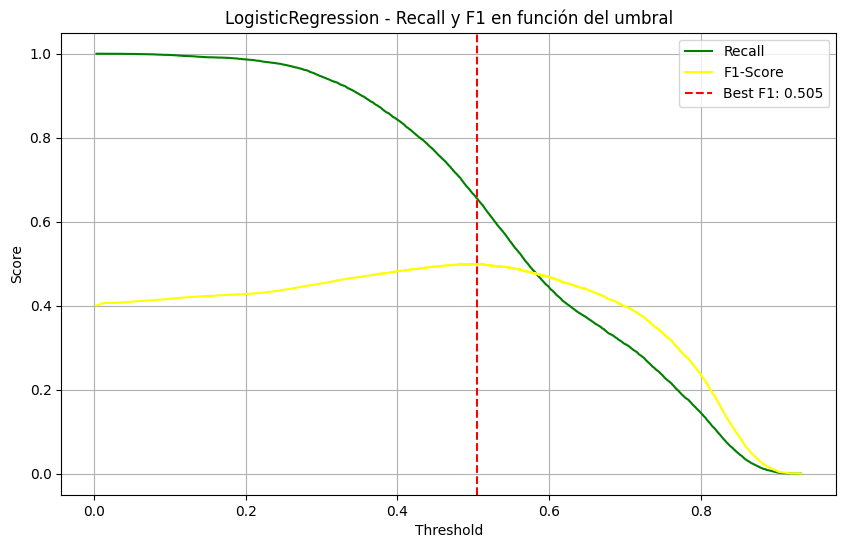

LogisticRegression
Métricas calculadas con el mejor umbral para F1 en Test (0.505)
 
 🟠 Train results:
 AUC: 0.727
 Recall : 0.644
 F1-score : 0.493
 Precision : 0.399
 Specificity: 0.675
 Accuracy: 0.667
 
 🔵 Test results:
 AUC: 0.733
 Recall : 0.655
 F1-score : 0.499
 Precision : 0.403
 Specificity: 0.676
 Accuracy: 0.670


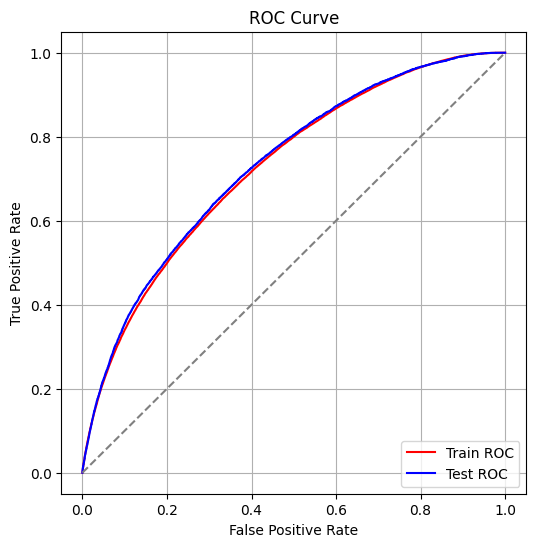

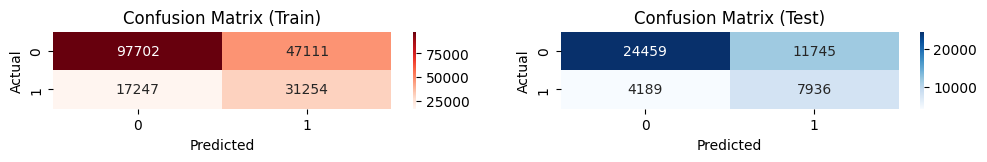

In [284]:
# Calculamos métricas
metricas_rl_opt = compute_metrics(model_rl_opt, X_train_reducido, y_train, X_test_reducido, y_test)

- Se guardan las metricas de cada modelo optimizado para hacer una comparacion final y elegir el mejor modelo

In [358]:
# Agregamos las métricas del modelo de árbol
metricas_globales.append(metricas_rl_opt)

#### 6.4. Árbol de decisión

In [ ]:
# Desactivar warnings para una salida más limpia
warnings.filterwarnings("ignore")

# Validación cruzada estratificada (mejor para datasets desbalanceados)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Función objetivo para Optuna
def objective(trial):
    # Hiperparámetros sugeridos
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'random_state': 42
    }

    # Definir el modelo
    model = DecisionTreeClassifier(**params)

    # Validación cruzada con AUC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Maximizar AUC

# Pruner optimizado: Hyperband para una exploración eficiente
pruner = optuna.pruners.HyperbandPruner(min_resource=5, max_resource=50, reduction_factor=3)

# Configurar y ejecutar la optimización con Optuna
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=500)  # 500 pruebas 

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


Mejores hiperparámetros: {'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 9, 'criterion': 'gini', 'max_features': None, 'class_weight': 'balanced'}


In [190]:
# Definimos modelo con los hiperparámetros óptimos
model_dt_opt = DecisionTreeClassifier(**study.best_params, random_state=42)

# Entrenamos el modelo
model_dt_opt.fit(X_train_reducido, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=9,
                       min_samples_split=4, random_state=42)

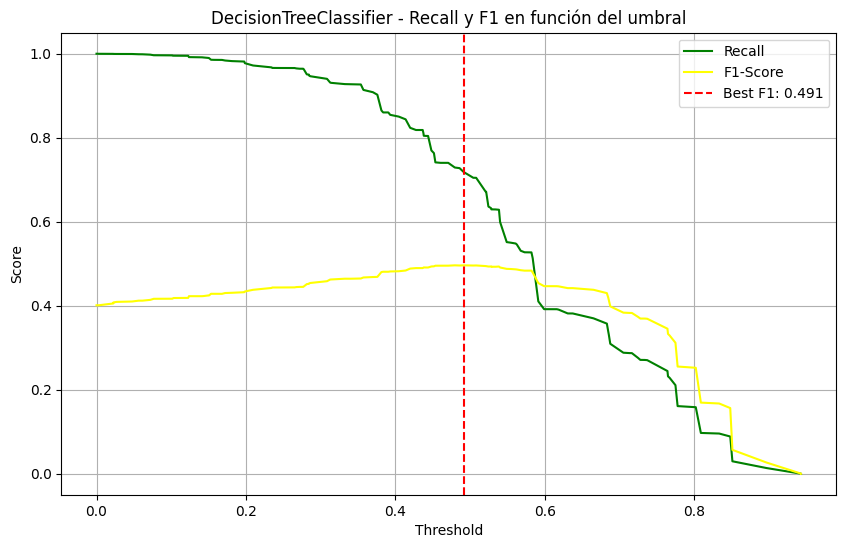

DecisionTreeClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.491)
 
 🟠 Train results:
 AUC: 0.730
 Recall : 0.718
 F1-score : 0.496
 Precision : 0.379
 Specificity: 0.606
 Accuracy: 0.634
 
 🔵 Test results:
 AUC: 0.731
 Recall : 0.718
 F1-score : 0.496
 Precision : 0.379
 Specificity: 0.606
 Accuracy: 0.634


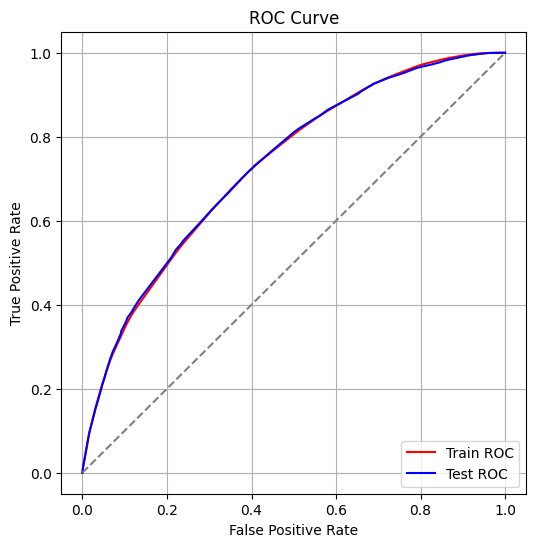

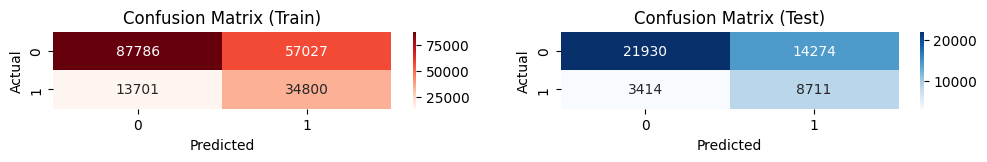

In [287]:
# Calculmos métricas
metricas_dt_opt = compute_metrics(model_dt_opt, X_train_reducido, y_train, X_test_reducido, y_test)

In [359]:
# Guardamos el las métricas del modelo optimizado
metricas_globales.append(metricas_dt_opt)

#### 6.5. Random Forest

In [194]:
# Definimos el modelo random forest
model_rf_1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Entrenamos el modelo
model_rf_1.fit(X_train_reducido, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

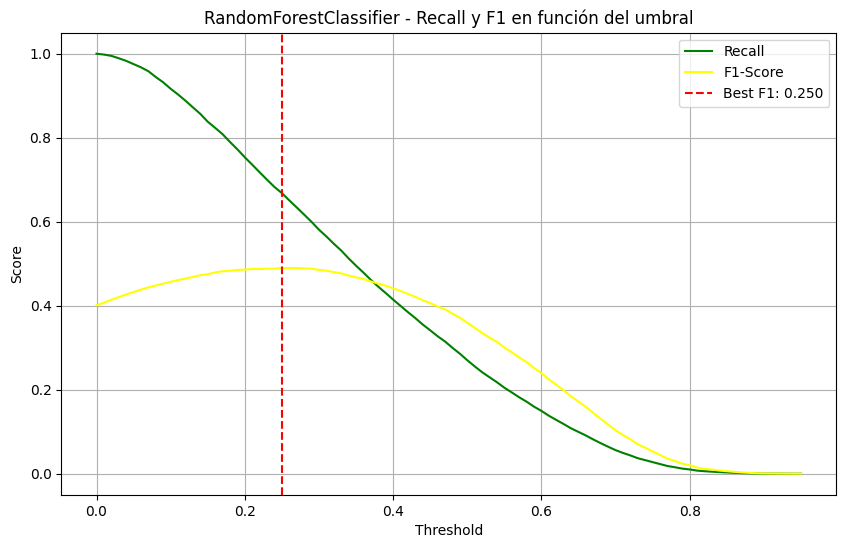

RandomForestClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.250)
 
 🟠 Train results:
 AUC: 1.000
 Recall : 1.000
 F1-score : 0.968
 Precision : 0.938
 Specificity: 0.978
 Accuracy: 0.983
 
 🔵 Test results:
 AUC: 0.718
 Recall : 0.668
 F1-score : 0.490
 Precision : 0.387
 Specificity: 0.645
 Accuracy: 0.651


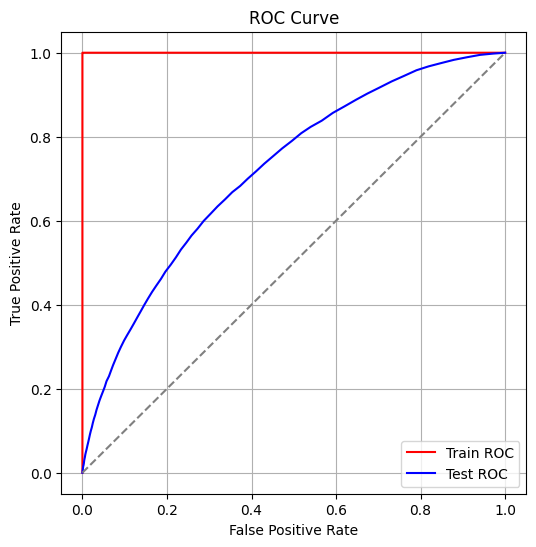

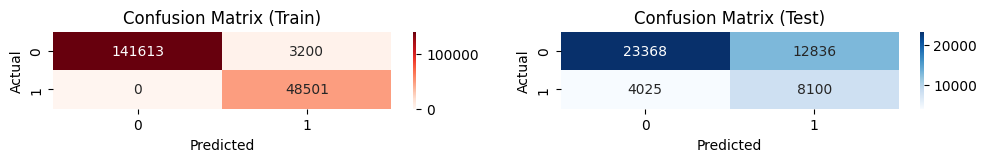

In [197]:
# Evaluamos el modelo
metric_rf = compute_metrics(model_rf_1, X_train_reducido, y_train, X_test_reducido, y_test)

- Optimizacion con Optuna

In [198]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna.visualization as vis
import warnings

# Desactivar warnings para una salida más limpia
warnings.filterwarnings("ignore")

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Función objetivo para Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced']),
        'oob_score': trial.suggest_categorical('oob_score', [True, False]),
        'warm_start': trial.suggest_categorical('warm_start', [False]),
        'random_state': 42,
        'n_jobs': -1
    }

    # Agregar max_samples solo si bootstrap es True
    if params['bootstrap']:
        params['max_samples'] = trial.suggest_float('max_samples', 0.6, 0.9)

    # Modelo y evaluación
    model = RandomForestClassifier(**params)
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return auc

# Configurar Optuna con HyperbandPruner
pruner = optuna.pruners.HyperbandPruner(min_resource=10, max_resource=50, reduction_factor=3)
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=100)  # 100 pruebas

# Resultados
print("Mejores hiperparámetros:", study.best_params)

Mejores hiperparámetros: {'n_estimators': 227, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 9, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': False, 'warm_start': False, 'max_samples': 0.713288146815702}


In [203]:
# Definir el modelo con los mejores hiperparámetros
model_rf_opt = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)

# Entrenar el modelo
model_rf_opt.fit(X_train_reducido, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='log2',
                       max_samples=0.713288146815702, min_samples_leaf=9,
                       min_samples_split=19, n_estimators=227, n_jobs=-1,
                       random_state=42)

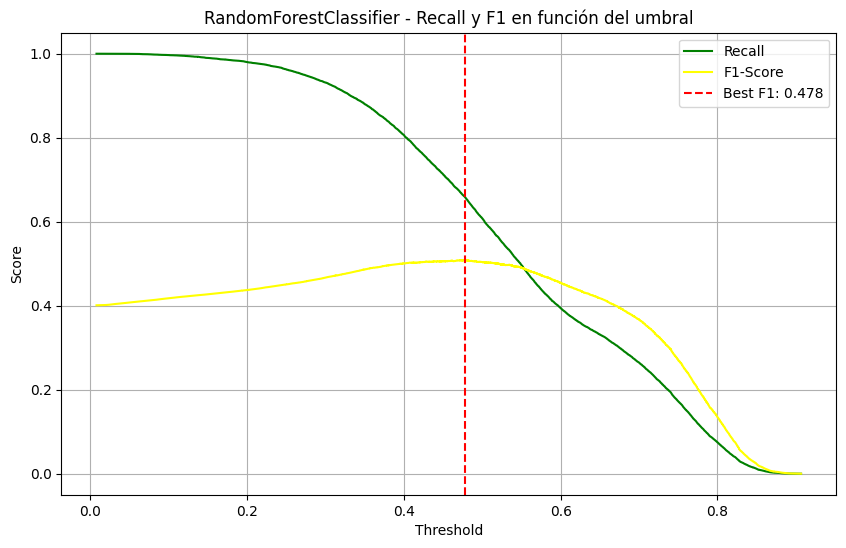

RandomForestClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.478)
 
 🟠 Train results:
 AUC: 0.817
 Recall : 0.755
 F1-score : 0.579
 Precision : 0.470
 Specificity: 0.715
 Accuracy: 0.725
 
 🔵 Test results:
 AUC: 0.744
 Recall : 0.659
 F1-score : 0.509
 Precision : 0.414
 Specificity: 0.688
 Accuracy: 0.681


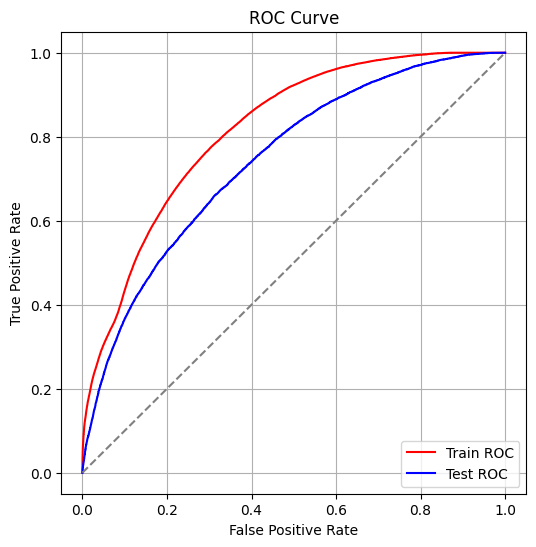

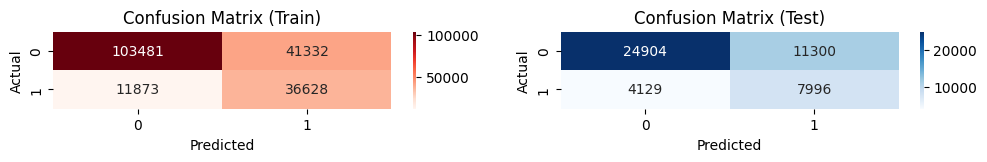

In [256]:
# calcular métricas con el umbral óptimo para el modelo
metricas_dt = compute_metrics(model_rf_opt, X_train_reducido, y_train, X_test_reducido, y_test)

- La curva roc indica sobreajuste en los datos de Train

- Optimización 2 con Optuna para reducir sobreajuste

In [206]:
# Desactivar warnings para una salida más limpia
warnings.filterwarnings("ignore")

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Función objetivo para Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300), # Reducimos la cantidad de árboles
        'max_depth': trial.suggest_int('max_depth', 3, 10), # Reducir para evitar sobreajuste
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 30),# Más muestras para hacer splits
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2',0.5,0.3, 0.4]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced']),
        'oob_score' : trial.suggest_categorical('oob_score', [True, False]),  # Evaluación OOB para medir overfitting
        'warm_start': trial.suggest_categorical('warm_start', [False]),
        'random_state': 42,
        'n_jobs': -1
    }

    # Agregar max_samples solo si bootstrap es True
    if params['bootstrap']:
        params['max_samples'] = trial.suggest_float('max_samples', 0.3, 0.9) # Limitamos la cantidad de datos por árbol

    # Modelo y evaluación
    model = RandomForestClassifier(**params)
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return auc

# Configurar Optuna con HyperbandPruner
pruner = optuna.pruners.HyperbandPruner(min_resource=10, max_resource=50, reduction_factor=3)
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=100)  # 100 pruebas

# Resultados
print("Mejores hiperparámetros:", study.best_params)

Mejores hiperparámetros: {'n_estimators': 202, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8, 'criterion': 'gini', 'max_features': 0.5, 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': False, 'warm_start': False, 'max_samples': 0.8504513496581371}


In [207]:
# Definir el modelo con los mejores hiperparámetros
model_rf_opt_2 = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)

# Entrenar el modelo
model_rf_opt_2.fit(X_train_reducido, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.5,
                       max_samples=0.8504513496581371, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=202, n_jobs=-1,
                       random_state=42)

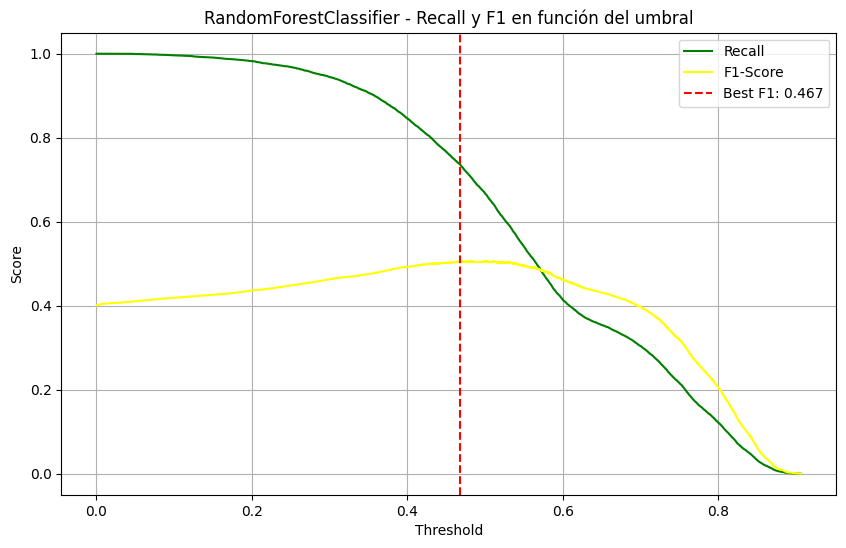

RandomForestClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.467)
 
 🟠 Train results:
 AUC: 0.765
 Recall : 0.764
 F1-score : 0.523
 Precision : 0.398
 Specificity: 0.613
 Accuracy: 0.651
 
 🔵 Test results:
 AUC: 0.742
 Recall : 0.738
 F1-score : 0.506
 Precision : 0.385
 Specificity: 0.605
 Accuracy: 0.638


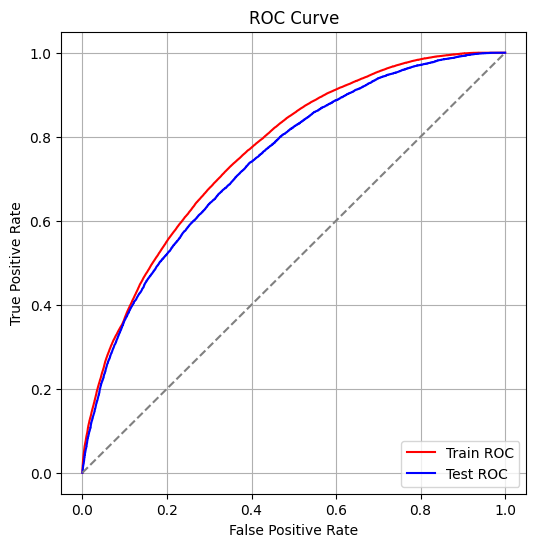

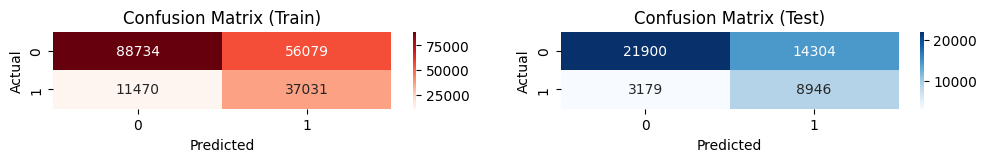

In [290]:
# Cálculo de métricas
metricas_rf_opt = compute_metrics(model_rf_opt_2, X_train_reducido, y_train, X_test_reducido, y_test)

In [360]:
# Guardamos las métricas del modelo optimizado
metricas_globales.append(metricas_rf_opt)

#### 6.6. Adaboost

- Entrenamos modelo con parámetros por defecto

In [212]:
# Use AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

# Define the model
model_ab_1 = AdaBoostClassifier(random_state=42)

# Train the model
model_ab_1.fit(X_train_reducido, y_train)

AdaBoostClassifier(random_state=42)

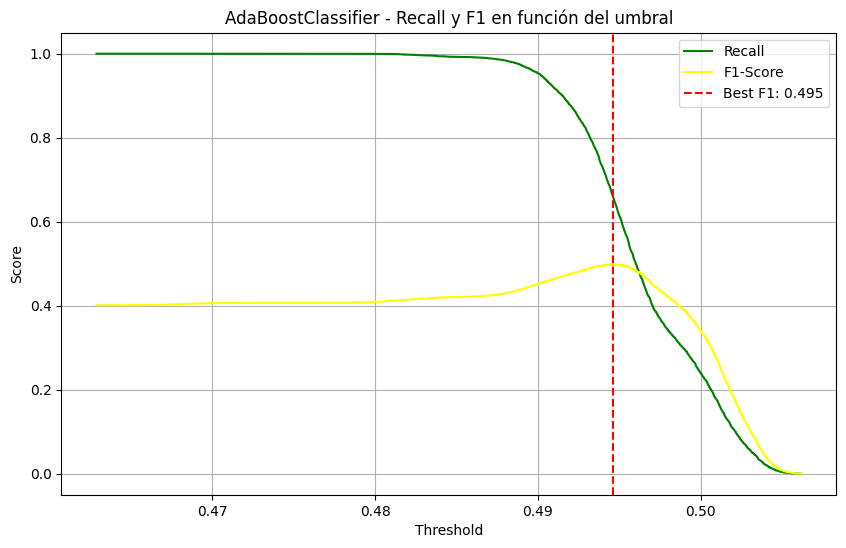

AdaBoostClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.495)
 
 🟠 Train results:
 AUC: 0.729
 Recall : 0.653
 F1-score : 0.496
 Precision : 0.400
 Specificity: 0.672
 Accuracy: 0.667
 
 🔵 Test results:
 AUC: 0.733
 Recall : 0.660
 F1-score : 0.499
 Precision : 0.401
 Specificity: 0.670
 Accuracy: 0.667


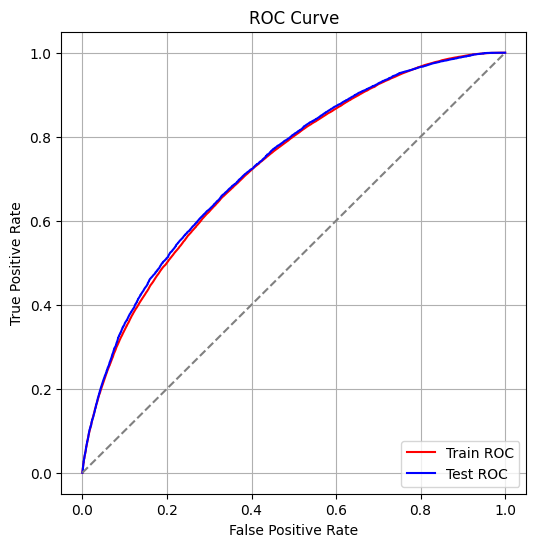

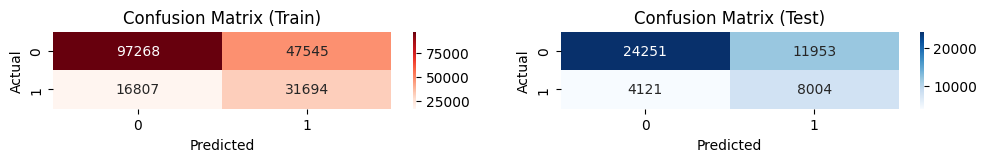

In [213]:
# Cáclulo de métricas
metric_ab = compute_metrics(model_ab_1, X_train_reducido, y_train, X_test_reducido, y_test)

- Optimización de Adaboost con Optuna

In [ ]:
# Desactivar advertencias para una salida más limpia
warnings.filterwarnings("ignore")

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros

    params_estimator = {
        'max_depth': trial.suggest_int('max_depth', 1, 5),  # Profundidad del árbol base,
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),  # Mínimo de muestras para dividir nodo
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),  # Mínimo de muestras en una hoja
        'class_weight': trial.suggest_categorical('class_weight', ['balanced']),  # Balanceo de clases
        'random_state': 42
    }
    
    params_model = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  # Número de árboles débiles
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),  # Tasa de aprendizaje
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),  # Algoritmo de boosting
        'random_state': 42
    }
    
    # Definir el base estimator como un árbol de decisión optimizado
    estimator = DecisionTreeClassifier(**params_estimator)
    

    # Crear el modelo AdaBoost con los hiperparámetros sugeridos
    model = AdaBoostClassifier(estimator= estimator, **params_model)
    

    # Evaluación con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para detener pruebas innecesarias
pruner = optuna.pruners.HyperbandPruner(min_resource=10, max_resource=50, reduction_factor=3)
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=100, show_progress_bar= True, timeout=3600)  # Ejecutar 100 pruebas máx 1 hora

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


  0%|          | 0/100 [00:00<?, ?it/s]

[W 2025-02-07 17:51:03,664] Trial 27 failed with parameters: {'max_depth': 1, 'min_samples_split': 8, 'min_samples_leaf': 3, 'class_weight': 'balanced', 'n_estimators': 193, 'learning_rate': 0.29448069698111135, 'algorithm': 'SAMME.R'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\usuario\AppData\Local\Temp\ipykernel_1968\3067849537.py", line 35, in objective
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
 

KeyboardInterrupt: 

In [223]:
study.best_params

{'max_depth': 1,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'class_weight': 'balanced',
 'n_estimators': 276,
 'learning_rate': 0.887694974630479,
 'algorithm': 'SAMME.R'}

In [227]:
# Definir el clasificador base (árbol de decisión)
base_estimator = DecisionTreeClassifier(
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    class_weight=study.best_params['class_weight'],
)

# Definir el modelo AdaBoost con el clasificador base
model_ab_opt = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    algorithm=study.best_params['algorithm'],
    random_state=42
)

# Entrenar el modelo
model_ab_opt.fit(X_train_reducido, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    min_samples_leaf=4,
                                                    min_samples_split=8),
                   learning_rate=0.887694974630479, n_estimators=276,
                   random_state=42)

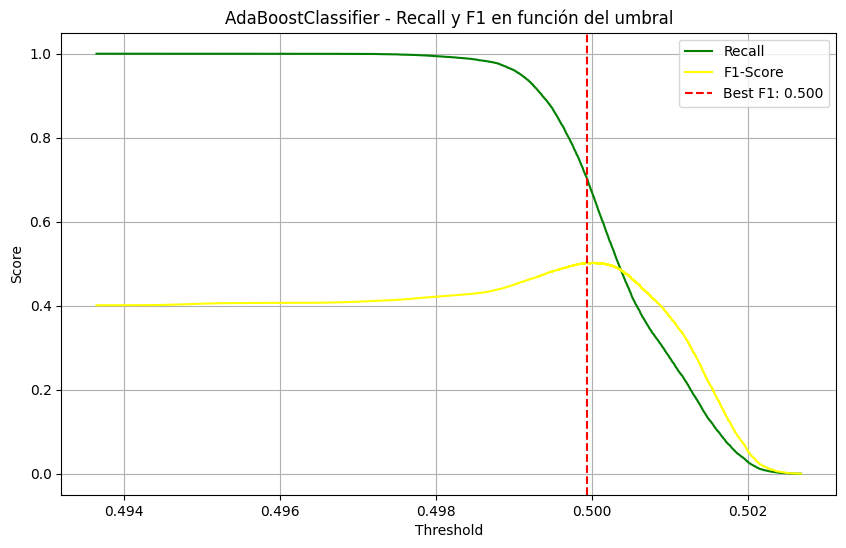

AdaBoostClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.500)
 
 🟠 Train results:
 AUC: 0.735
 Recall : 0.700
 F1-score : 0.501
 Precision : 0.390
 Specificity: 0.633
 Accuracy: 0.650
 
 🔵 Test results:
 AUC: 0.738
 Recall : 0.706
 F1-score : 0.502
 Precision : 0.390
 Specificity: 0.630
 Accuracy: 0.649


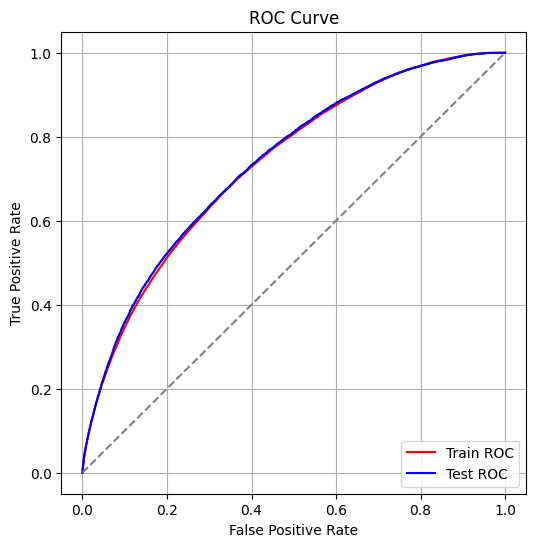

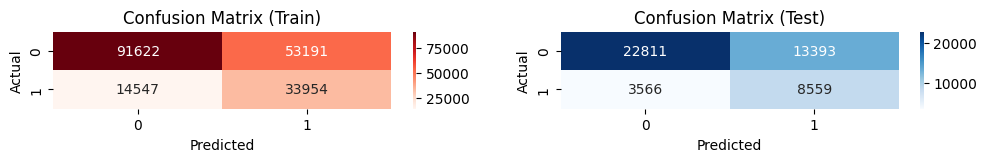

In [292]:
# Calculamos métricas
metric_ab_opt = compute_metrics(model_ab_opt, X_train_reducido, y_train, X_test_reducido, y_test)

In [361]:
# Guardamos las métricas del modelo optimizado
metricas_globales.append(metric_ab_opt)

#### 6.7. XGBoost

In [229]:
# Definimos el modelo XGBoost con parámetros por defecto
model_xgb_1 = XGBClassifier(random_state=42)

# Entrenamos el modelo
model_xgb_1.fit(X_train_reducido, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

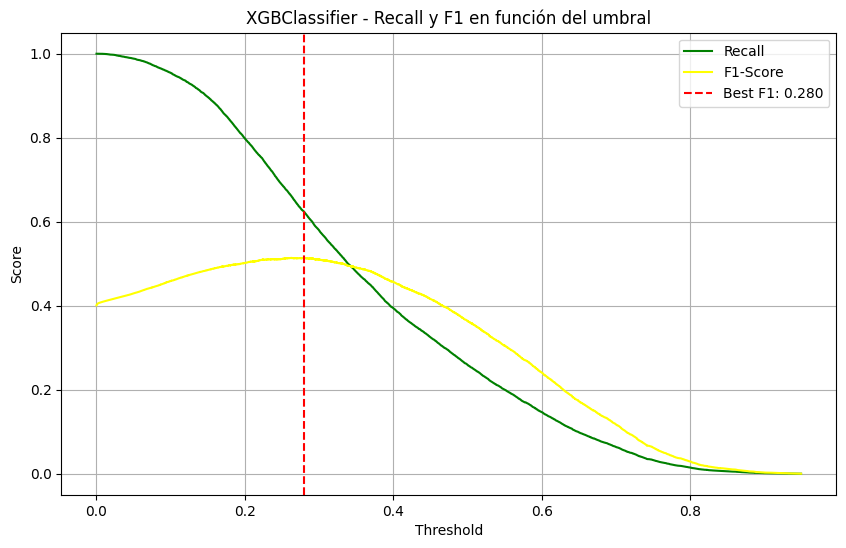

XGBClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.280)
 
 🟠 Train results:
 AUC: 0.792
 Recall : 0.674
 F1-score : 0.555
 Precision : 0.472
 Specificity: 0.747
 Accuracy: 0.729
 
 🔵 Test results:
 AUC: 0.750
 Recall : 0.624
 F1-score : 0.514
 Precision : 0.437
 Specificity: 0.731
 Accuracy: 0.704


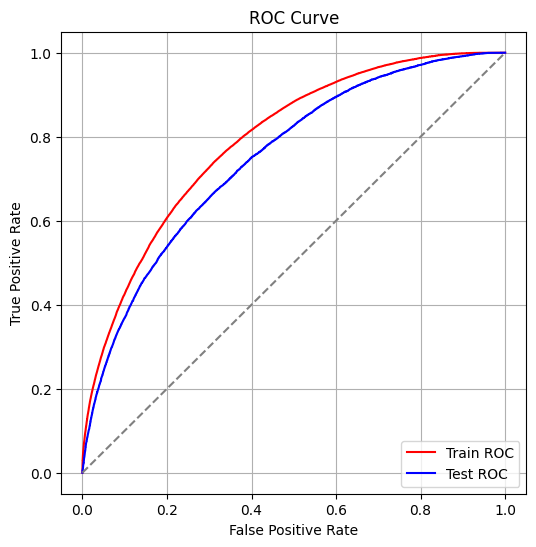

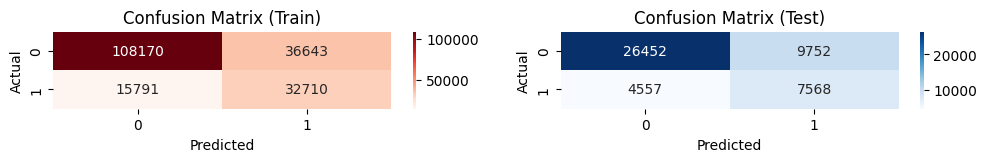

In [230]:
# Calculamos métricas
metric_xgb = compute_metrics(model_xgb_1, X_train_reducido, y_train, X_test_reducido, y_test)

- Hay Sobreajuste en Train

- Optimización con Optuna

In [234]:
# Desactivar advertencias para una salida más limpia
warnings.filterwarnings("ignore")

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros

    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 50, 800),  # Más árboles para mejorar generalización
        'max_depth' : trial.suggest_int('max_depth', 3, 9),  # Evita árboles demasiado profundos (overfitting)
        'learning_rate' : trial.suggest_float('learning_rate', 0.005, 0.3, log=True),  # Ajuste fino con log-scale
        'subsample' : trial.suggest_float('subsample', 0.3, 0.7),  # Ayuda a evitar overfitting
        'colsample_bytree' : trial.suggest_float('colsample_bytree', 0.3, 0.9),  # Reduce correlación entre árboles
        'gamma' : trial.suggest_float('gamma', 0, 5),  # Controla divisiones en árboles
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 20) , # Controla tamaño mínimo de hojas
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 5),  # Regularización L1
        'reg_lambda' : trial.suggest_float('reg_lambda', 0.5, 5),  # Regularización L2
        'scale_pos_weight' : trial.suggest_float('scale_pos_weight', 1, 5),  # Compensa el desbalance de clases
        'random_state': 42,
        'n_jobs' : -1}
    
    # Crear el modelo XGBOOST con los hiperparámetros sugeridos
    model = XGBClassifier(**params)
    

    # Evaluación con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para detener pruebas innecesarias
pruner = optuna.pruners.HyperbandPruner(min_resource=10, max_resource=50, reduction_factor=3)
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=100, show_progress_bar= True, timeout=3600)  # Ejecutar 100 pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


  0%|          | 0/100 [00:00<?, ?it/s]

Mejores hiperparámetros: {'n_estimators': 798, 'max_depth': 7, 'learning_rate': 0.018531818083258614, 'subsample': 0.6855367375491371, 'colsample_bytree': 0.6834019090308207, 'gamma': 2.5328910628106103, 'min_child_weight': 16, 'reg_alpha': 3.8407287825857215, 'reg_lambda': 1.6907992859043888, 'scale_pos_weight': 2.2299442508317666}


In [236]:
# Definir el modelo con los mejores hiperparámetros
model_xgb_opt = XGBClassifier(**study.best_params, random_state=42)

# Entrenar el modelo
model_xgb_opt.fit(X_train_reducido, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6834019090308207, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.5328910628106103,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.018531818083258614,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=16, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=798, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

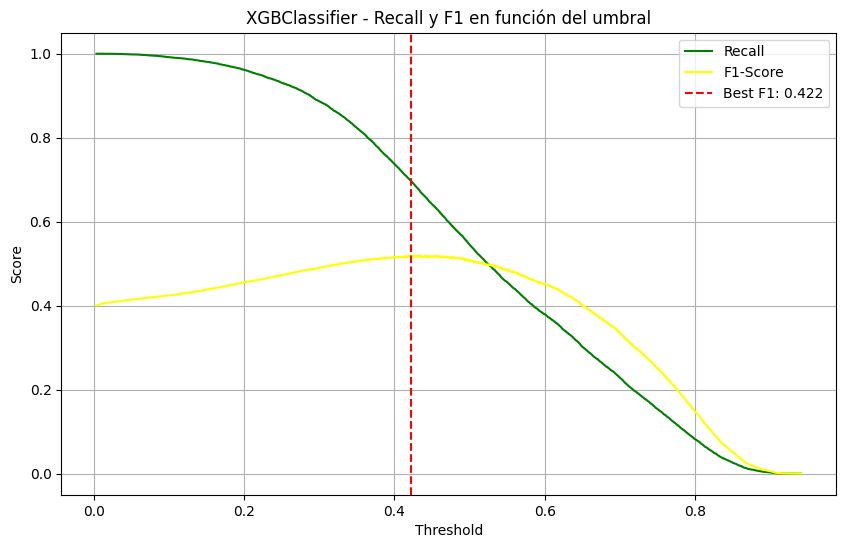

XGBClassifier
Métricas calculadas con el mejor umbral para F1 en Test (0.422)
 
 🟠 Train results:
 AUC: 0.779
 Recall : 0.729
 F1-score : 0.542
 Precision : 0.431
 Specificity: 0.678
 Accuracy: 0.691
 
 🔵 Test results:
 AUC: 0.754
 Recall : 0.699
 F1-score : 0.518
 Precision : 0.412
 Specificity: 0.666
 Accuracy: 0.674


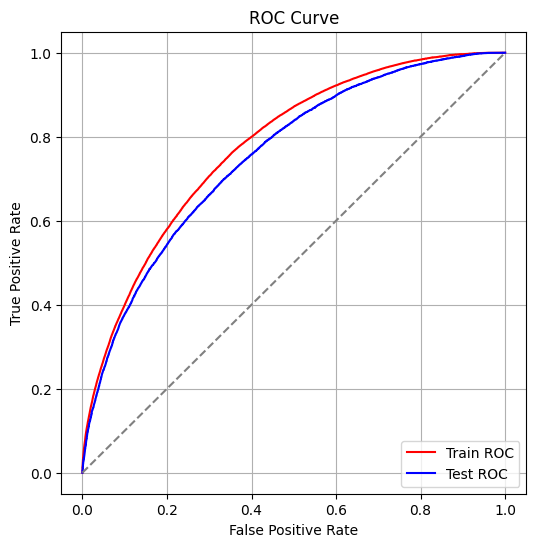

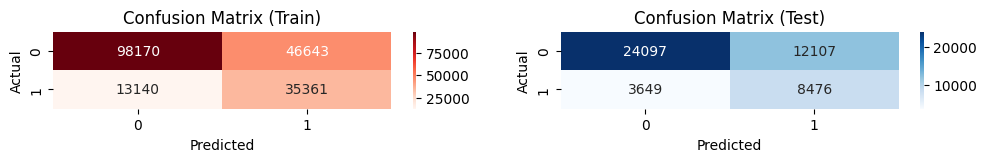

In [237]:
# Cálculo de métricas
metric_xgb_opt = compute_metrics(model_xgb_opt, X_train_reducido, y_train, X_test_reducido, y_test)

In [362]:
# Guardamos las métricas del modelo optimizado
metricas_globales.append(metric_xgb_opt)

### 7. Evaluación de Modelos

In [363]:
# Convertir las métricas de test en un dataframe
import pandas as pd

# Inicialización del DataFrame
df_metricas_test = pd.DataFrame()

# Métricas simples
df_metricas_test['Modelo'] = [m['model_name'] for m in metricas_globales]
df_metricas_test['best_threshold_f1'] = [m['best_threshold_f1'] for m in metricas_globales]

# Métricas de entrenamiento y prueba
for tipo in ['Test']:
    for metrica in ['AUC', 'Recall', 'F1-Score', 'Precision', 'Specificity', 'Accuracy']:
        df_metricas_test[f'{metrica} {tipo}'] = [m[f'{tipo.lower()}_metrics'][metrica] for m in metricas_globales]

df_metricas_test

,Modelo,best_threshold_f1,AUC Test,Recall Test,F1-Score Test,Precision Test,Specificity Test,Accuracy Test
0,GaussianNB,0.423555,0.697942,0.707546,0.476929,0.359691,0.578168,0.610627
1,LogisticRegression,0.505321,0.732516,0.654515,0.499025,0.403232,0.675588,0.670301
2,DecisionTreeClassifier,0.491198,0.731149,0.718433,0.496212,0.378986,0.605734,0.634009
3,RandomForestClassifier,0.467320,0.742481,0.737814,0.505781,0.384774,0.604906,0.638250
4,AdaBoostClassifier,0.499929,0.738143,0.705897,0.502333,0.389896,0.630069,0.649093
5,XGBClassifier,0.421536,0.754488,0.699052,0.518283,0.411796,0.665589,0.673985


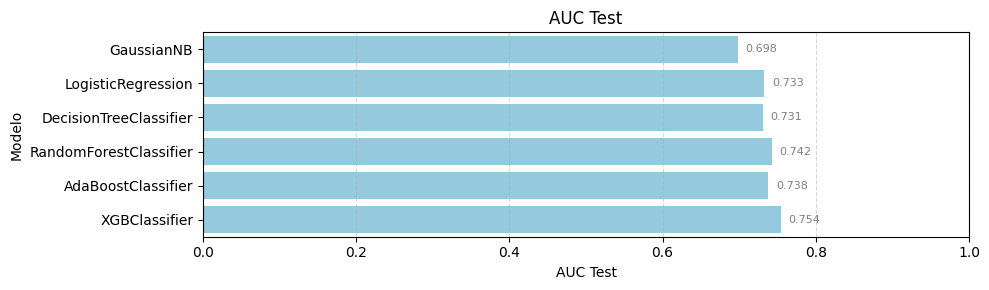

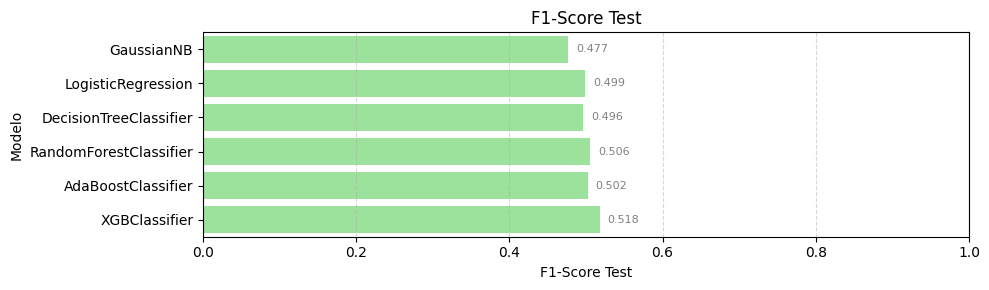

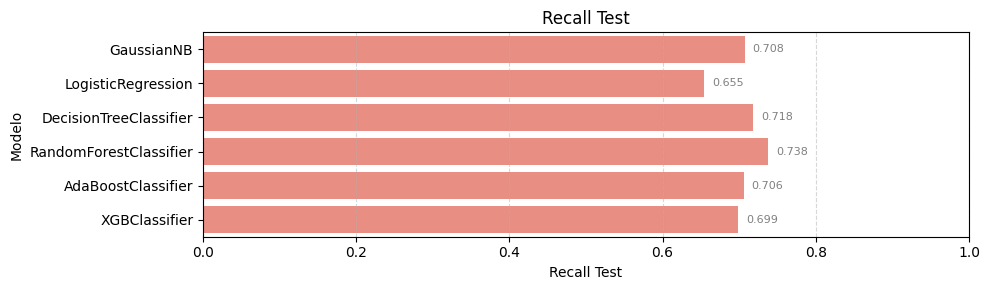

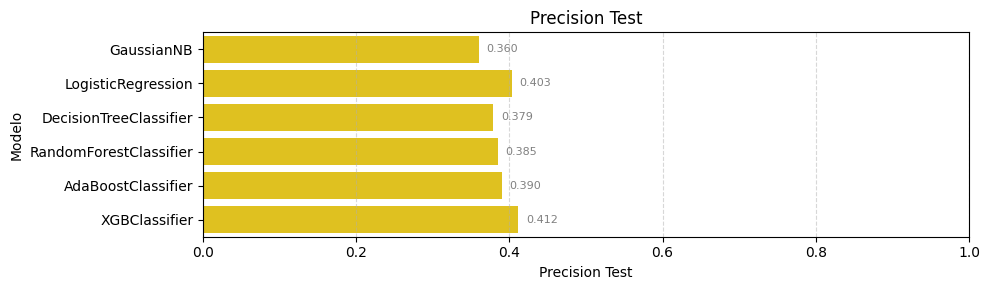

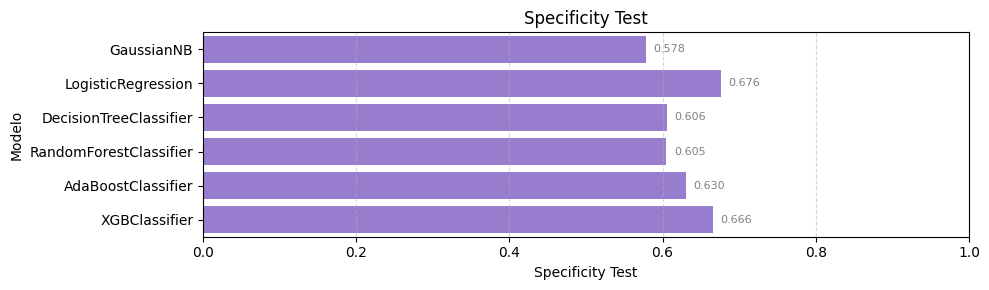

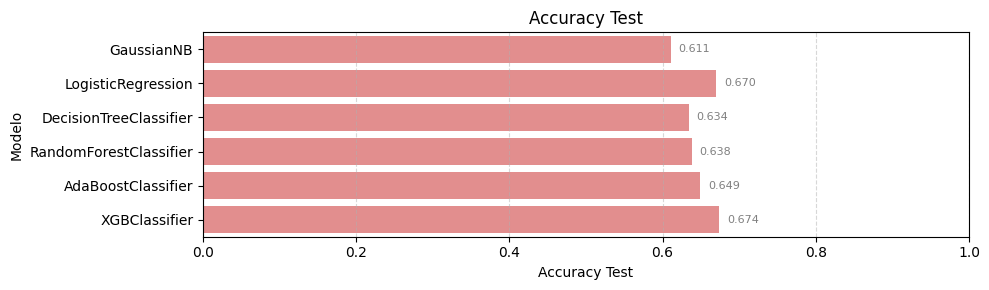

In [365]:
# Gráfico de barras para las métricas de test

# Paleta de colores para los gráficos
colores = {
    'AUC Test': 'skyblue',
    'F1-Score Test': 'lightgreen',
    'Recall Test': 'salmon',
    'Precision Test': 'gold',
    'Specificity Test': 'mediumpurple',
    'Accuracy Test': 'lightcoral'
}

# Lista de métricas a graficar
metricas = ['AUC Test', 'F1-Score Test', 'Recall Test', 'Precision Test', 'Specificity Test', 'Accuracy Test']

# Graficar cada métrica con etiquetas
for metrica in metricas:
    plt.figure(figsize=(10, 3))
    ax = sns.barplot(x=metrica, y='Modelo', data=df_metricas_test, color=colores.get(metrica, 'gray'))
    
    # 📏 Establecer el límite del eje X y agregar líneas de guía
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    # 🏷️ Añadir etiquetas de valores a cada barra
    for i, (valor, modelo) in enumerate(zip(df_metricas_test[metrica], df_metricas_test['Modelo'])):
        plt.text(
            valor + 0.01,  # Posición X: ligeramente a la derecha de la barra
            i,             # Posición Y: alineada con la barra
            f'{valor:.3f}',# Formato del valor (2 decimales)
            va='center',   # Alineación vertical centrada
            ha='left',     # Alineación horizontal a la izquierda de la coordenada X
            fontsize=8,    # Tamaño de la fuente
            color='grey'  # Color del texto
        )
    
    plt.title(f'{metrica}')
    plt.tight_layout()  # Asegura que no se recorte el gráfico
    plt.show()
